In [43]:
# plot the audio data
# use popup window
import matplotlib.pyplot as plt

from utils import *

energy: 0.08852976
power: 0.00069163874


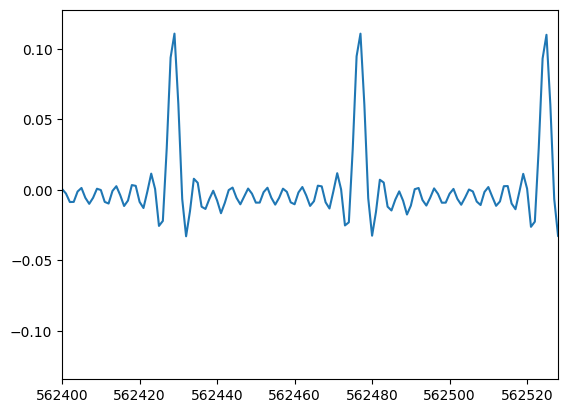

In [39]:
rate, cap = read_wave_file('/home/ryo/code/supersonic/build/raw_input.wav')
t = np.arange(len(cap)) / rate

# start = 562400
# end = 562200
# end = 566000

start = 562400
end   = start + 128

# start = 568000
# end   = start + 128

plt.plot(cap)
plt.xlim([start, end])

wave = cap[start:end]
# plt.plot(wave)
energy = np.sum(wave ** 2)
power = energy / len(wave)
print('energy:', energy)
print('power:', power)

# chirp power 0.0055035655
# data  power 0.00069163874
# empty poewr 3.5920675e-06

In [42]:
0.00069163874
# 6.9163874e-4

0.00069163874

In [44]:
rate, cap = read_wave_file('/home/ryo/code/supersonic/build/raw_input.wav')
rate, play = read_wave_file('/home/ryo/code/supersonic/build/raw_output.wav')

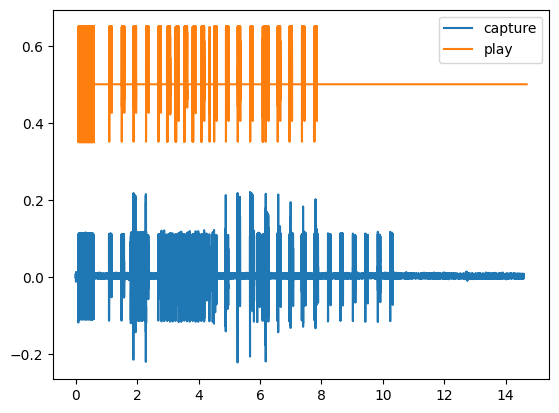

In [48]:
t = np.arange(len(cap)) / rate

plt.plot(t, cap)
plt.plot(t + 0.09, play * 0.15 + 0.5)
plt.legend(['capture', 'play'])

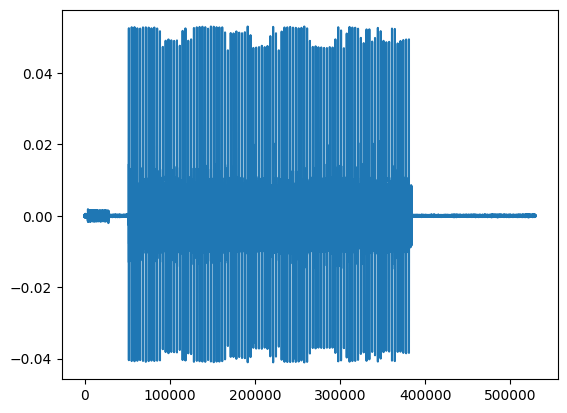

In [85]:
def gen_chirp(f_0, c, duration, rate):
    f_1 = c * duration + f_0

    def phi(t):
        return 2 * np.pi * (c / 2 * t * t + f_0 * t)

    times = np.linspace(0, duration, int(rate * duration)+1)[:-1]
    chirp = np.sin(phi(times))
    chirp_rev = -np.flip(chirp)
    chirp = np.concatenate((chirp, chirp_rev))
    chirp = np.concatenate((chirp, np.zeros(6)))
    return chirp

chirp = gen_chirp(5000, 5000000, 0.001, 48000)

corr = np.correlate(cap, chirp, mode='same') / len(chirp)

plt.plot(corr)